# Изучение закономерностей, определяющих успешность игр

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
* **Name**— название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.express as px
import seaborn as sns
sns.set()
import missingno as msno

In [2]:
from math import factorial
from scipy.stats import binom, norm
from math import sqrt
from datetime import datetime

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv(r'C:\Users\tarko\OneDrive\Рабочий стол\Анализ данных\Проекты\games.csv')

display(df)
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Из данных видно, что таблица содержит 16715 строк и 11 столбцов. В ней представлена информация о видеоиграх, включая название игры, платформу, год выпуска, жанр, объемы продаж в разных регионах, оценки критиков и пользователей, а также рейтинг игры.

Некоторые столбцы содержат пропущенные значения: "Name" (2 пропущенных значения), "Year_of_Release" (269 пропущенных значений), "Genre" (2 пропущенных значения), "Critic_Score" (8580 пропущенных значений), "User_Score" (6701 пропущенное значение) и "Rating" (6766 пропущенных значений).

Типы данных в таблице включают в себя числовые значения (float64) и текстовые значения (object).

Общий объем памяти, занимающий таблица, составляет 1.4+ мегабайт.

## Обработка данных

In [4]:
# проверяем наличие пропущенных значений в df
print(df.isnull().sum(),'\n')

# смотрим долю пропусков датафрейма
display(pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm'))

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64 



,0
Critic_Score,51.300000
Rating,40.500000
User_Score,40.100000
Year_of_Release,1.600000
Name,0.000000
Genre,0.000000
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


<Axes: >

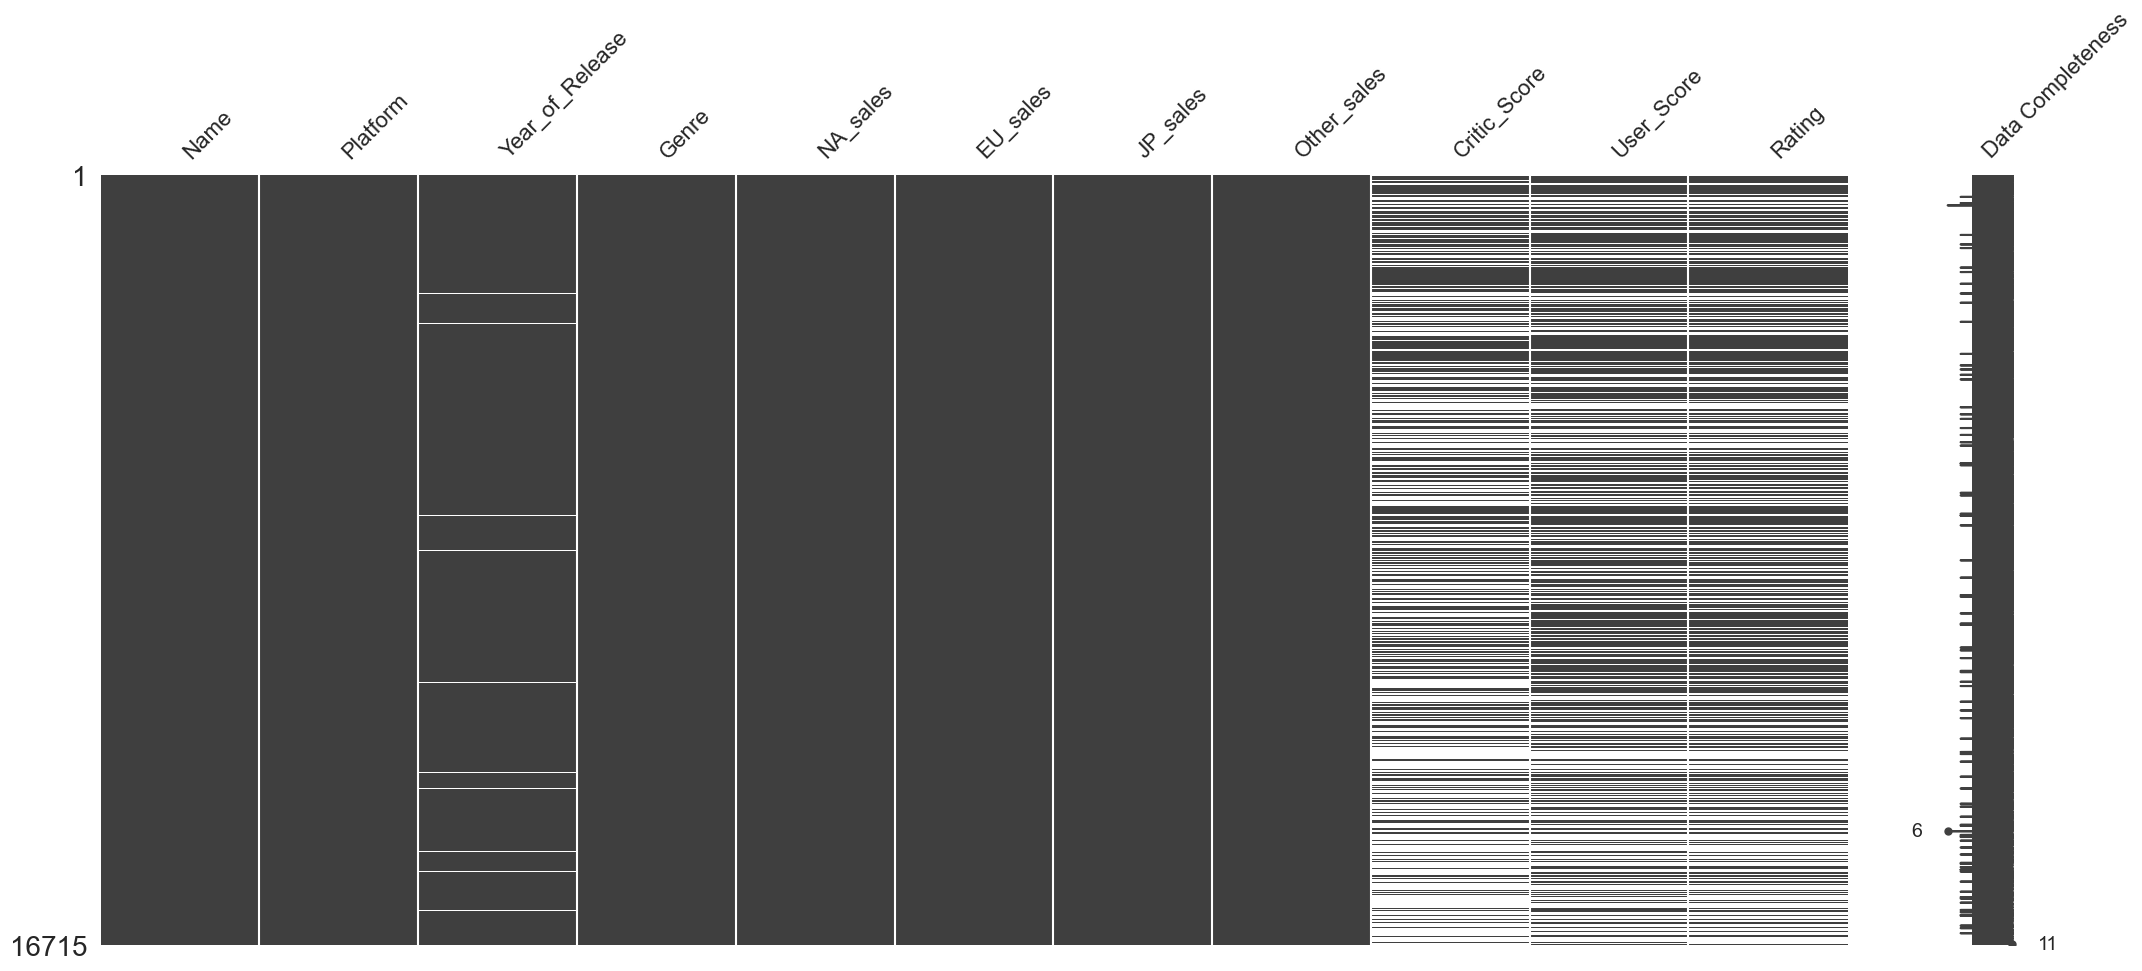

In [5]:
msno.matrix(df, labels=True)

In [6]:
# заменяем названий столбцов на нижний регистр
df.columns = df.columns.str.lower()

# удаляем пропуски 
df.dropna(subset=['year_of_release'], inplace=True)
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

# преобразовываем  типы данных в нужные типы
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [7]:
# обработываем значения 'tbd' в столбце 'user_score'
df['user_score'] = df['user_score'].replace('tbd', 'NaN').astype(float)

# заменяем значения 'NaN' в столбце 'rating' на рейтинг неопределен - RT
df['rating'] = df['rating'].fillna('RT')

In [8]:
# проверяем наличие явных дубликатов в датафрейме
print('Число дубликатов df:', df.duplicated().sum(),'\n')

Число дубликатов df: 0 



In [9]:
# проверяем наличие неявных дубликатов
print(df['platform'].sort_values().unique())
print(df['genre'].sort_values().unique())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [10]:
# проверяем наличие пропущенных значений в df
print(df.isnull().sum(),'\n')

# смотрим долю пропусков датафрейма
display(pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm'))

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64 



,0
user_score,54.600000
critic_score,51.500000
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000


In [11]:
# рассчитываем суммарные продажи во всех регионах и добавляем столбц с результатами
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(df)
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RT,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RT,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RT,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RT,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RT,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RT,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Вывод**

После выполненой обработки, можно сделать вывод, что пропущенные значения были устранены, названия столбцов были приведены к нижнему регистру, а типы данных столбцов были преобразованы в нужные. Также были выполнены следующие операции:
* Значения 'tbd' в столбце 'user_score' были заменены на 'NaN' и приведены к типу float.
* Пропущенные значения в столбце 'rating' были заменены на 'RT'.
* Была выполнена проверка наличия явных и неявных дубликатов. В результате, явных дубликатов не обнаружено.
* Была рассчитана суммарная продажа игр во всех регионах и добавлен соответствующий столбец 'total_sales'.

Проанализировав данные, мы можем определить возможные причины пропусков. Пропуски могут возникать по различным причинам:
* Пропуски в столбце year_of_release:
   * Одна из возможных причин - ошибки при вводе данных или утеря информации.
   
* Пропуски в столбцах critic_score, user_score и rating:
   * Пропуски могут быть вызваны тем, что оценки критиков и пользователей недоступны или не были выставлены. Заполнение пропусков в столбцах оценок неточными данными может исказить анализ. Поэтому удалять их также нецелесообразно.

* Пропуски в других столбцах:
   * Пропуски в других столбцах могут быть вызваны различными причинами: от ошибок ввода данных до отсутствия соответствующей информации.

## Исследовательский анализ данных

###  Игры выпускаемые в разные годы

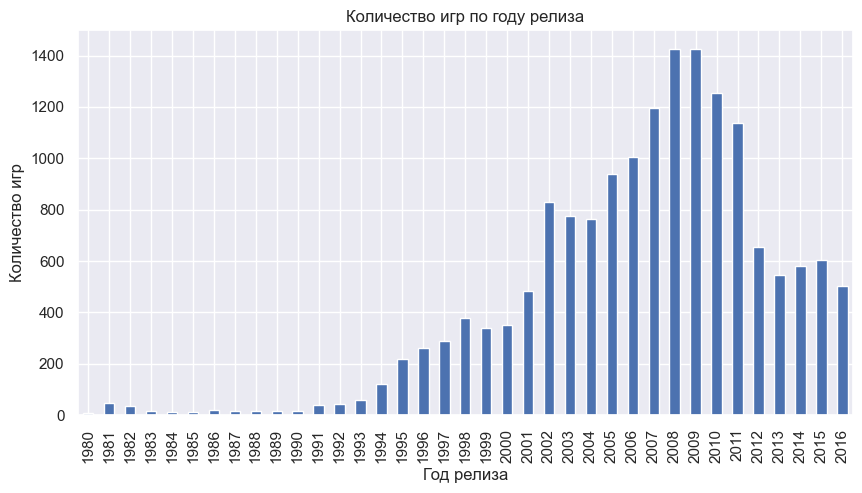

In [12]:
year_counts = df.groupby('year_of_release').size()
year_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Количество игр по году релиза')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

* На графике видно, что с 1980 года количество выпущенных игр растет с некоторыми колебаниями, достигает пика в 2008-2009 годах, а затем начинает постепенно снижаться.
* Наибольшее количество игр было выпущено в 2008 году, а наименьшее - в 1980 году и 2016 году.

###  Изменение продаж по платформам

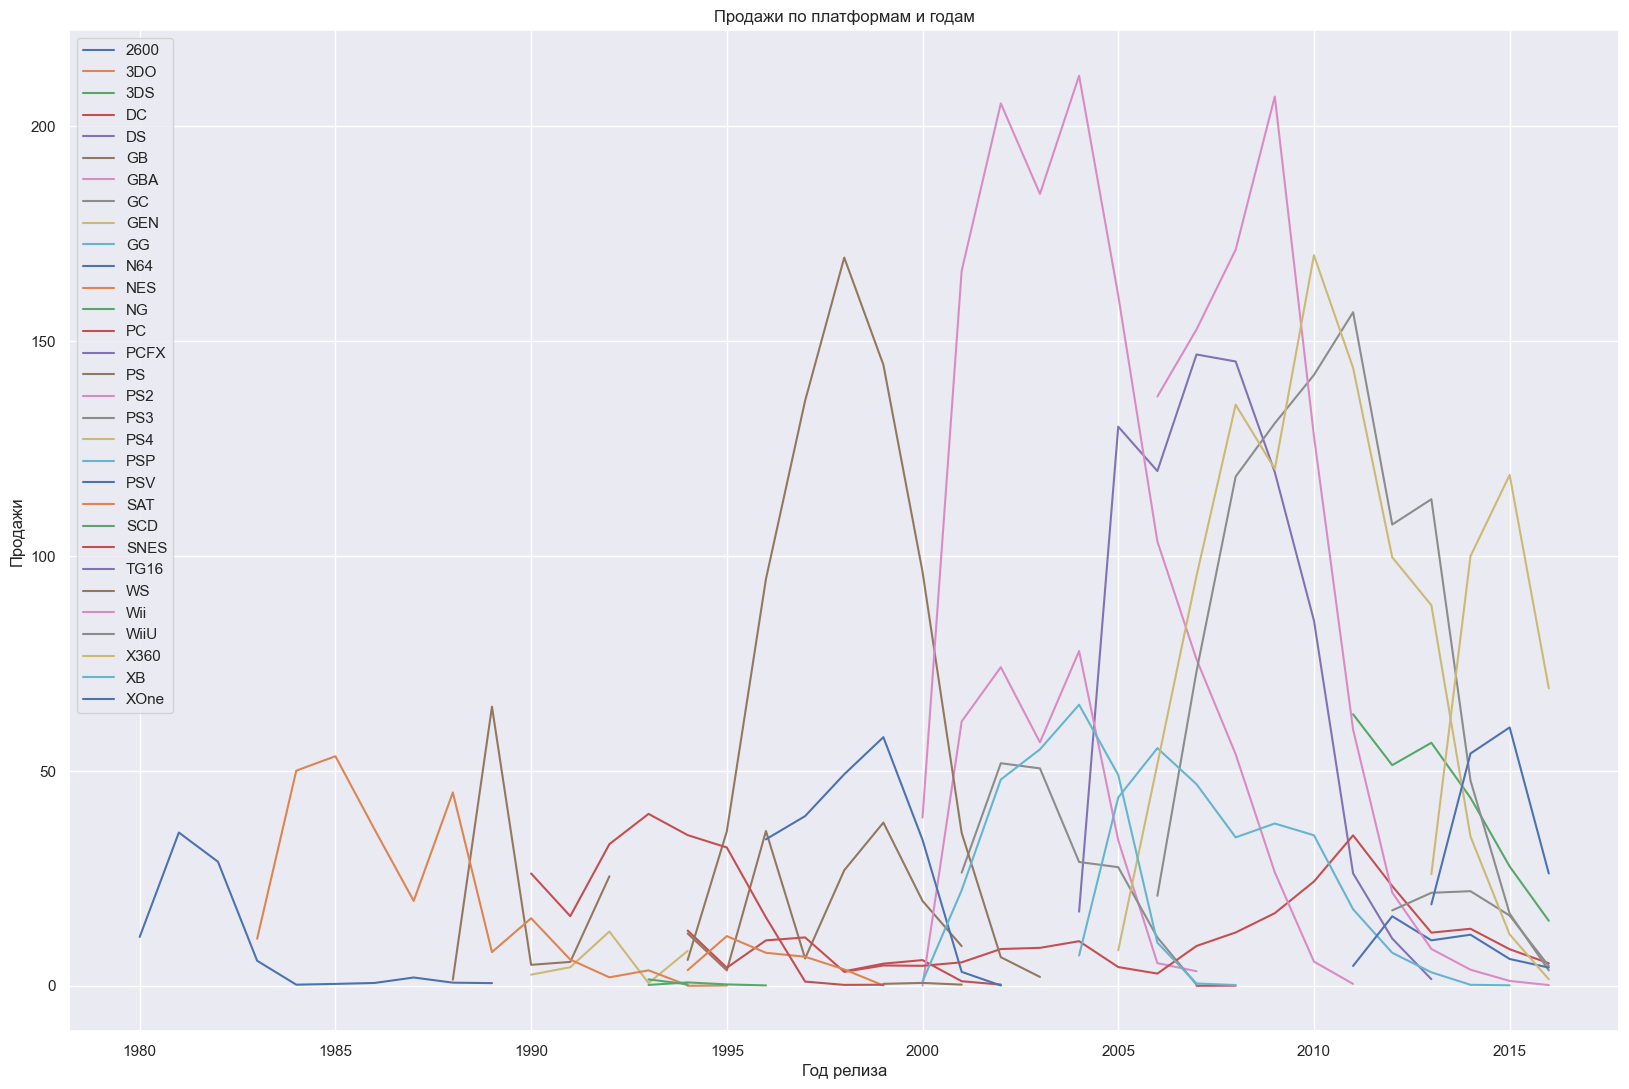

In [13]:
platform_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

sales_pivot = platform_sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

plt.figure(figsize=(20, 13))

for platform in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[platform], label=platform)

plt.xlabel('Год релиза')
plt.ylabel('Продажи')
plt.title('Продажи по платформам и годам')
plt.legend()
plt.show()


* На графике видно, что самые популярные платформы по суммарным продажам в период с 1980 по 2016 годы - это PS2, X360, PS3, Wii, DS.

###  Топ популярных платформ

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


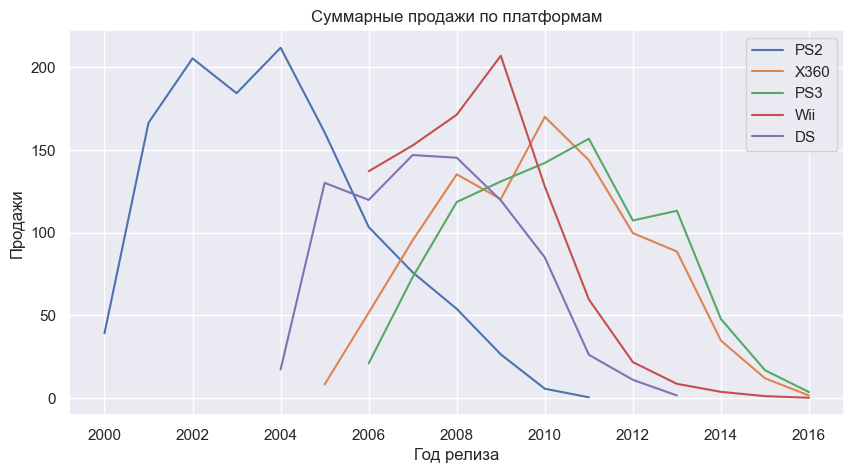

In [14]:
platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
platform_sales.columns = ['platform', 'total_sales']

# топ платформ по суммарным продажам
top_platforms = platform_sales.nlargest(5, 'total_sales')
display(top_platforms)

# распределение продаж по годам для топ платформ
platform_years = df[df['platform'].isin(top_platforms['platform'])]
platform_years = platform_years.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_years = platform_years.query('year_of_release >= 2000')

# график продаж по годам для топ платформ
plt.figure(figsize=(10,5))
for platform in top_platforms['platform']:
    platform_data = platform_years[platform_years['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.xlabel('Год релиза')
plt.ylabel('Продажи')
plt.title('Суммарные продажи по платформам')
plt.legend()
plt.show()

* PS2 имеет пиковые значения продаж в период с 2001 по 2006 годы, затем снижение.
* X360 имеет пиковые значения продаж в период с 2006 по 2011 годы, затем снижение.
* PS3 имеет пиковые значения продаж в период с 2006 по 2013 годы, затем снижение.
* Wii имеет пиковые значения продаж в период с 2006 по 2010 годы, затем снижение.
* DS имеет пиковые значения продаж в период с 2004 по 2011 годы, затем снижение.

В целом, видно, что пиковые значения продаж приходятся на примерно один и тот же временной интервал для разных платформ. Это может говорить о том, что игровая индустрия была на пике своей популярности в этот период, а затем начала снижаться, возможно, из-за появления новых платформ и изменения в предпочтениях пользователей.

###  Лидирующие, растущие, падающие и потенциально прибыльные платформы по продажам с 2014 года

In [15]:
# определяем актуальный период
df_actual = df[df['year_of_release'] >=2014]
display(df_actual)
df_actual.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RT,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RT,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RT,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RT,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RT,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RT,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RT,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


In [16]:
# группировка продаж по платформам
platform_sales_grop = df_actual.groupby('platform')['total_sales'].sum().reset_index()

# сортируем платформы по убыванию продаж
sorted_platforms = platform_sales_grop.sort_values('total_sales', ascending=False)

Платформы, лидирующие по продажам:
  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22


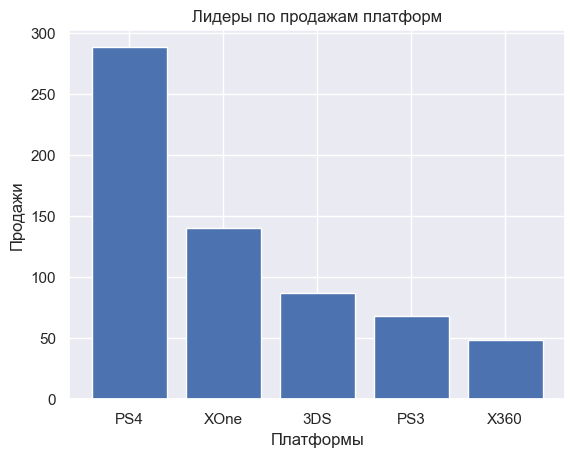

In [17]:
# определение лидеров по продажам
leader_platforms = sorted_platforms.head(5)

print('Платформы, лидирующие по продажам:')
print(leader_platforms)

# Создаем график
plt.bar(leader_platforms['platform'], leader_platforms['total_sales'])
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Лидеры по продажам платформ')
plt.show()

Платформы, растущие по продажам:
  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22


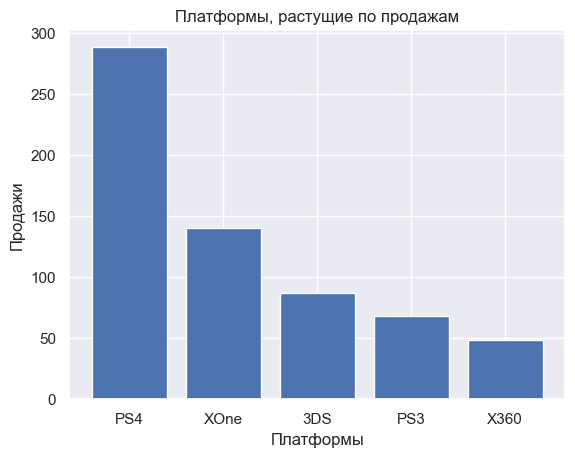

In [18]:
# определение растущих платформ
increasing_platforms = sorted_platforms[sorted_platforms['total_sales'] > 0].head(5)

print('Платформы, растущие по продажам:')
print(increasing_platforms)

# Создаем график
plt.bar(increasing_platforms['platform'], increasing_platforms['total_sales'])
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Платформы, растущие по продажам')
plt.show()

Платформы, падающие по продажам:
Empty DataFrame
Columns: [platform, total_sales]
Index: []


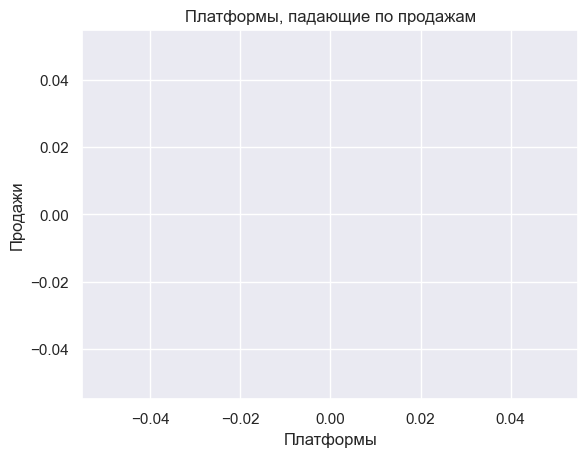

In [19]:
# определение убывающих платформ
decreasing_platforms = sorted_platforms[sorted_platforms['total_sales'] == 0].head(5)

print('Платформы, падающие по продажам:')
print(decreasing_platforms)

# Создаем график
plt.bar(decreasing_platforms['platform'], decreasing_platforms['total_sales'])
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Платформы, падающие по продажам')
plt.show()

Потенциально прибыльные платформы:
  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22


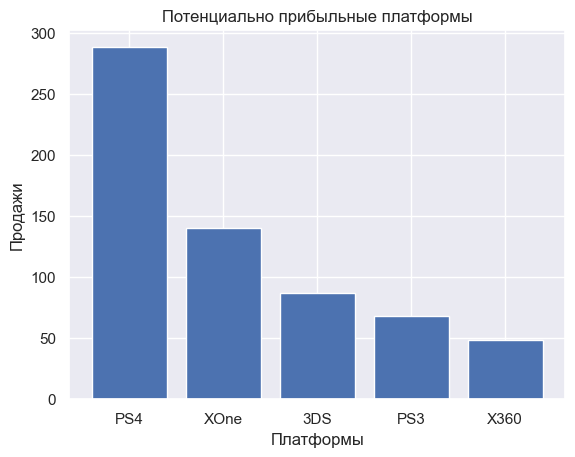

In [20]:
# определение потенциально прибыльных платформ
profitable_platforms = sorted_platforms.head(5)

print('Потенциально прибыльные платформы:')
print(profitable_platforms)

# Создаем график
plt.bar(profitable_platforms['platform'], profitable_platforms['total_sales'])
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Потенциально прибыльные платформы')
plt.show()

Исходя из результата можно сделать следующие выводы:
* лидирующими, растущими ипотенциально прибыльными платформами являются: 
  * PS4, XOne, 3DS, PS3, X360
* падающие платформы отсутствуют

### Построение графика «ящик с усами» по продажам игр и платформам

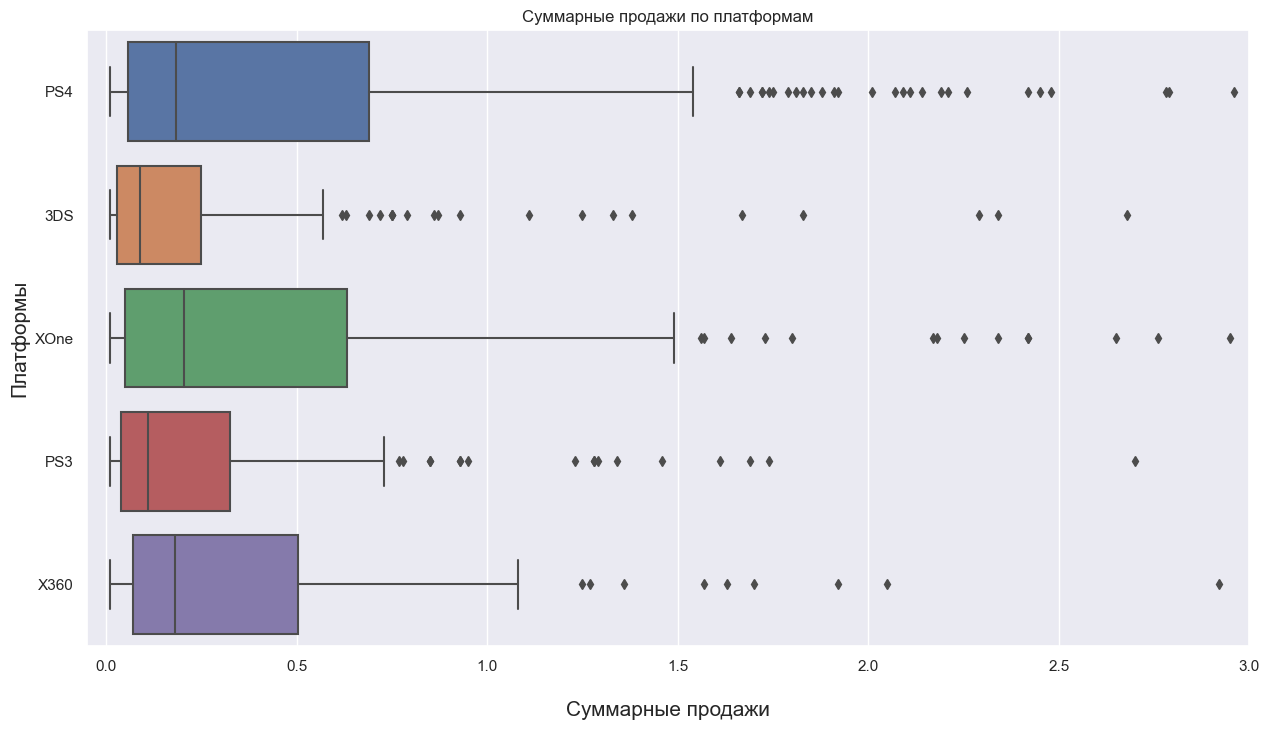

In [21]:
# Сортируем по суммарным продажам и выбираем только топ 5 платформ
top_5_platforms = df_actual.groupby('platform')['total_sales'].sum().nlargest(5).index
df_top_5_platforms = df_actual[df_actual['platform'].isin(top_5_platforms)]

# график "ящик с усами" по суммарным продажам игр в разбивке по платформам
plt.figure(figsize=(15, 8))
sns.boxplot(x='total_sales', y='platform', data=df_top_5_platforms)
plt.title('Суммарные продажи по платформам')
plt.ylabel('Платформы', fontsize=15)
plt.xlabel('Суммарные продажи', fontsize=15, labelpad=20)
plt.xlim(-0.05, 3)
plt.show()

Из графика "ящик с усами" по суммарным продажам игр в разбивке по платформам можно сделать следующие выводы:

* Платформа PS4 имеет наибольшую медианную и среднюю суммарную продажу игр, превышающую 1 млн копий.
* Платформы XOne и WiiU имеют примерно одинаковую медианную и среднюю суммарную продажу игр, ниже чем у PS4, но все равно превышающую 0.5 млн копий.
* Платформы 3DS и PS3 имеют значительно меньшую медианную и среднюю суммарную продажу игр, не превышающую 0.3 млн копий.
* У всех платформ есть выбросы в виде ибрида из ящика, что говорит о наличии успешных игр, которые значительно превышают среднюю продажу игр на данной платформе.
* Платформы PS4 и XOne имеют самое большое размах значений, что говорит о большей вариативности продаж игр на этих платформах.
* Платформа 3DS имеет наименьший размах значений, что говорит о более устойчивых продажах игр на этой платформе.

### Влияние отзывов пользователей и критиков на продажи платформ PS4, XOne и 3DS

In [22]:
df_ps4 = df_actual.query('platform == "PS4"')
matrix_corr = df_ps4[['total_sales', 'critic_score', 'user_score']].corr()
matrix_corr

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


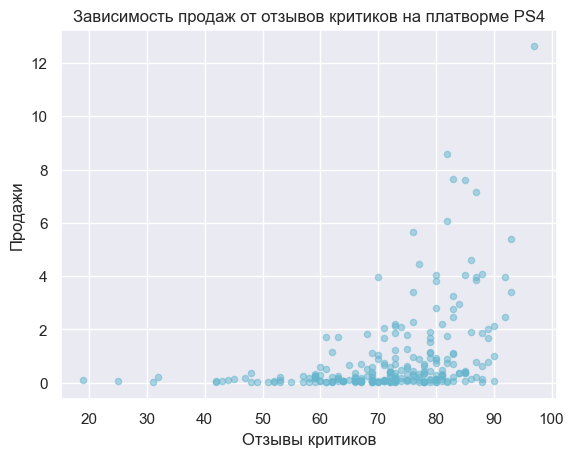

In [23]:
df_ps4.plot(x='critic_score', y='total_sales', color='c', kind='scatter', alpha=0.5, title='Зависимость продаж от отзывов критиков на платворме PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

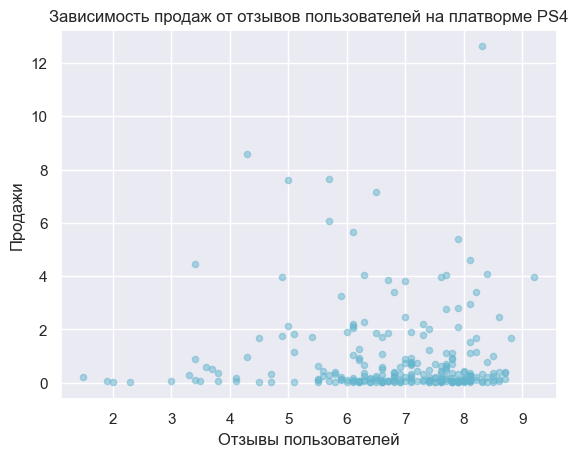

In [24]:
df_ps4.plot(x='user_score', y='total_sales', color='c', kind='scatter', alpha=0.5, title='Зависимость продаж от отзывов пользователей на платворме PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

На графиках видно, что на платформе PS4 есть слабая положительная корреляция между отзывами критиков и продажами игр. Это означает, что игры с более высокими оценками критиков имеют более высокие продажи. Однако связь не является очень сильной.
В отношении отзывов пользователей на платформе PS4 также наблюдается положительная корреляция с продажами игр, но связь слабее. 
Таким образом, для платформы PS4 отзывы критиков имеют большее влияние на продажи игр, чем отзывы пользователей.

In [25]:
df_xone = df_actual.query('platform == "XOne"')
matrix_corr = df_xone[['total_sales', 'critic_score', 'user_score']].corr()
matrix_corr

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


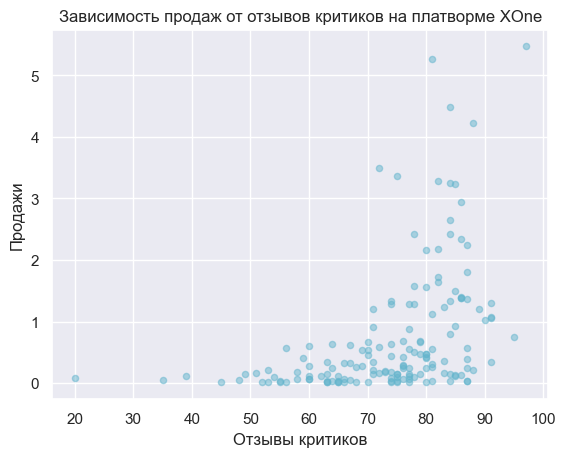

In [26]:
df_xone.plot(x='critic_score', y='total_sales', color='c', kind='scatter', alpha=0.5, title='Зависимость продаж от отзывов критиков на платворме XOne')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

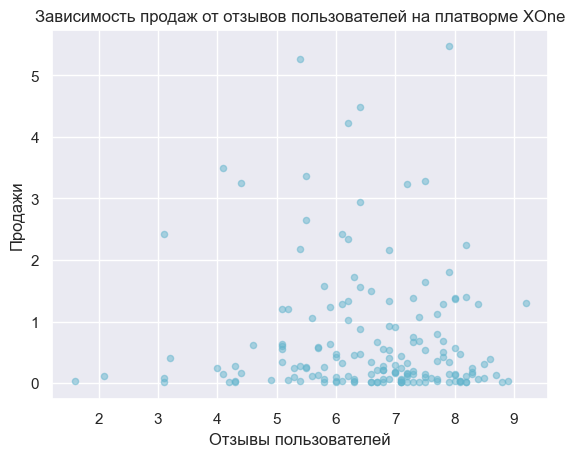

In [27]:
df_xone.plot(x='user_score', y='total_sales', color='c', kind='scatter', alpha=0.5, title='Зависимость продаж от отзывов пользователей на платворме XOne')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

Из матрицы корреляции видно, что продажи на платформе XOne имеют некоторую корреляцию с отзывами критиков и почти отсутствует корреляция с отзывами пользователей.

На первом графике видно, что с увеличением отзывов критиков продажи также немного увеличиваются. Однако есть некоторое количество игр с высокими отзывами критиков, но низкими продажами.

На втором графике видно, что продажи практически независят от отзывов пользователей. Есть как игры с высокими отзывами пользователей и высокими продажами, так и игры с низкими отзывами пользователей и высокими продажами.

Таким образом, можно сделать вывод, что на платформе XOne отзывы критиков слабо, но влияют на продажи игр, в то время как отзывы пользователей практически не влияют на продажи.

In [28]:
df_3ds = df_actual.query('platform == "3DS"')
matrix_corr = df_3ds[['total_sales', 'critic_score', 'user_score']].corr()
matrix_corr

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


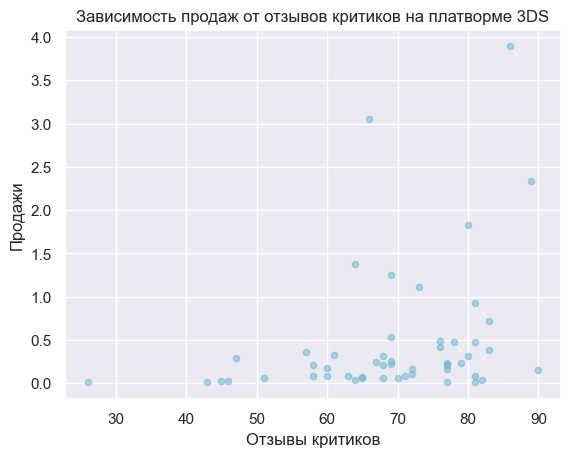

In [29]:
df_3ds.plot(x='critic_score', y='total_sales', color='c', kind='scatter', alpha=0.5, title='Зависимость продаж от отзывов критиков на платворме 3DS')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

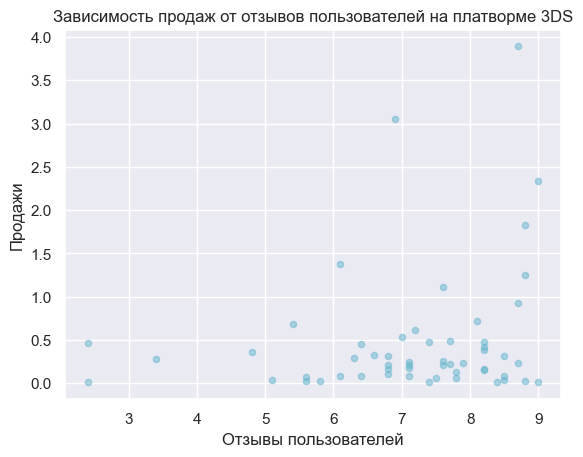

In [30]:
df_3ds.plot(x='user_score', y='total_sales', color='c', kind='scatter', alpha=0.5, title='Зависимость продаж от отзывов пользователей на платворме 3DS')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

Из рассмотрения матрицы корреляции и графика зависимости продаж от отзывов критиков и пользователей на платформе 3DS можно сделать следующие выводы:
* Продажи на платформе 3DS незначительно коррелируют с оценками критиков и пользователями.
* График зависимости продаж от оценок критиков и пользователей показывает, что хотя есть некоторая положительная корреляция, она не очень сильная. Видно, что с ростом оценок продажи не всегда увеличиваются.

В целом можно сказать, что оценки критиков и пользователей не являются основными факторами, влияющими на продажи игр на платформе 3DS.

Из проведенного исследования можно сделать общий вывод, что на различных игровых платформах (PS4, XOne и 3DS) влияние отзывов и оценок критиков и пользователей на продажи игр различается. На PS4 отзывы критиков имеют большее влияние на продажи, на XOne - слабое влияние отзывов критиков, а на 3DS - оценки критиков и пользователей не являются основными факторами, влияющими на продажи игр. Эти выводы могут быть полезны для разработчиков и издателей игр, чтобы лучше понять, какие факторы влияют на успешность их продуктов и каким образом эти факторы различаются в зависимости от игровой платформы.

### Общее распределение игр по жанрам

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64


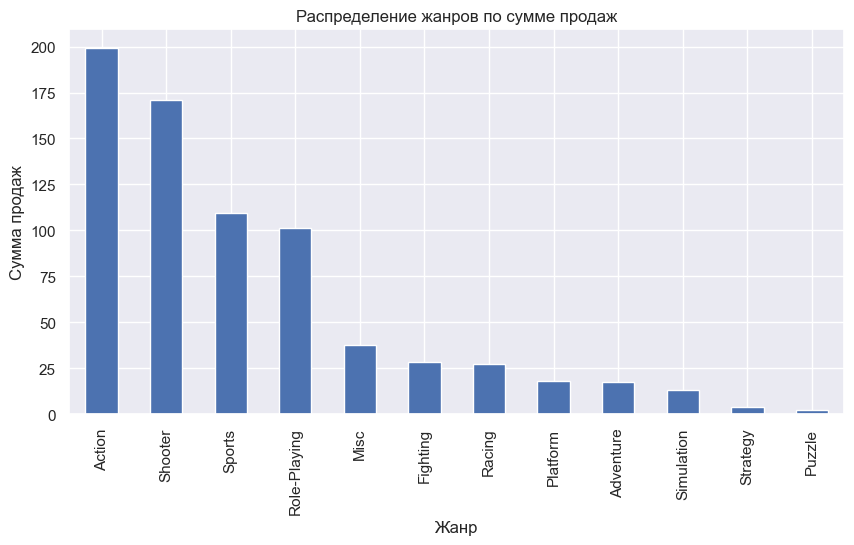

In [31]:
genre_sales = df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)
genre_sales.plot(kind='bar', figsize=(10,5))
plt.title('Распределение жанров по сумме продаж')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

На основании проведенного анализа данных можно сделать вывод о распределении жанров игр по сумме продаж. Самыми популярными и прибыльными жанрами являются экшн, шутеры и спортивные игры. Они лидируют по сумме продаж. Наименее популярными и менее прибыльными жанрами являются стратегии, головоломки и квесты.




genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64

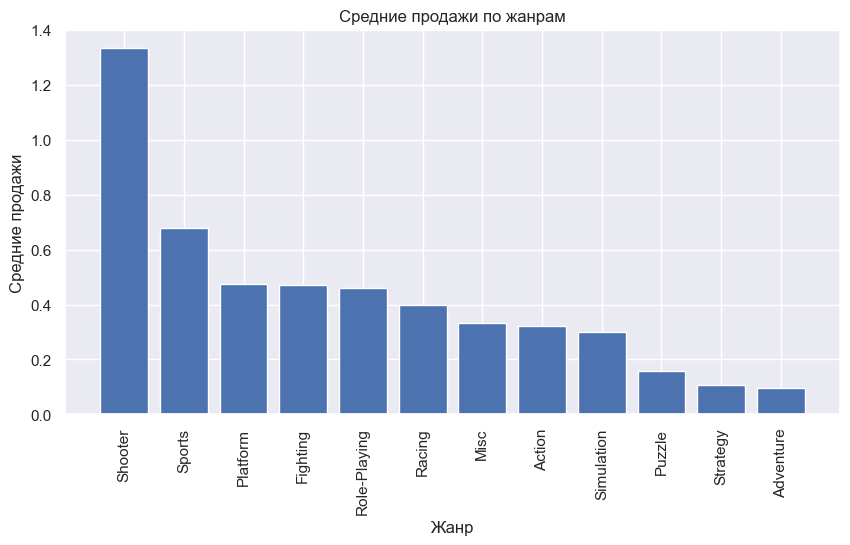

In [32]:
# График средних продаж по жанрам
genre_sales_mean = df_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
display(genre_sales_mean)

plt.figure(figsize=(10, 5))
plt.bar(genre_sales_mean.index, genre_sales_mean.values)
plt.xlabel('Жанр')
plt.ylabel('Средние продажи')
plt.title('Средние продажи по жанрам')
plt.xticks(rotation=90)
plt.show()

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

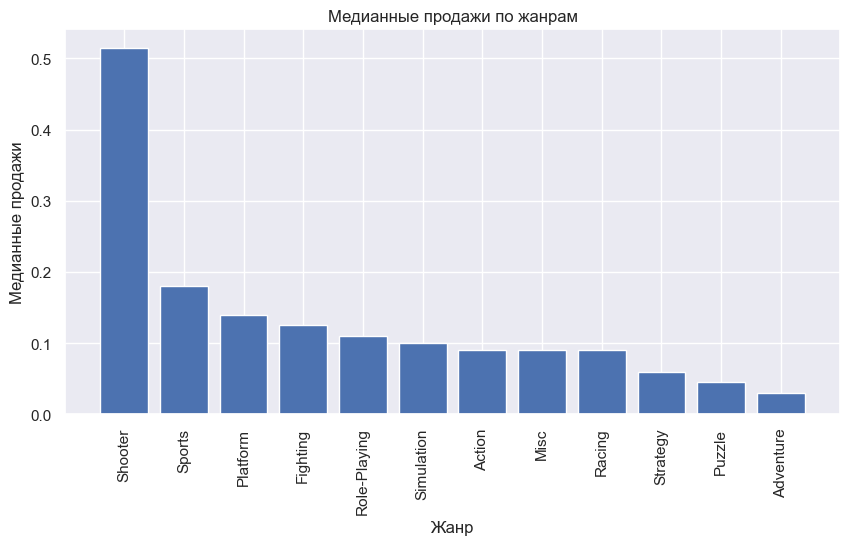

In [33]:
# График медианных продаж по жанрам
genre_sales_median = df_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)
display(genre_sales_median)

plt.figure(figsize=(10, 5))
plt.bar(genre_sales_median.index, genre_sales_median.values)
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.title('Медианные продажи по жанрам')
plt.xticks(rotation=90)
plt.show()

Исходя из графиков средних и медианных продаж по жанрам видно, что некоторые жанры имеют высокие значения и отличаются от остальных.

* По средним продажам лидируют жанры Shooter, Platform и Sports. Это может говорить о популярности игр этих жанров среди игроков и возможности получения высоких доходов от продажи таких игр.

* По медианным продажам самыми успешными жанрами являются Shooter, Sports и Fighting. Это говорит о том, что в данных жанрах присутствуют как компьютерные игры с высокими продажами, так и игры с небольшими продажами.

* В обоих случаях можно заметить, что жанры Action, Role-Playing и Adventure занимают высокие позиции как по средним, так и по медианным продажам. Это свидетельствует о популярности игр данных жанров среди игроков и успешности их продаж.

Таким образом, при планировании рекламной кампании стоит обратить внимание на жанры Shooter, Sports, Action, Role-Playing и Adventure, поскольку они имеют высокий потенциал для получения высоких доходов от продажи игр.

**Вывод**

Исходя из проведенного анализа данных, можно сделать вывод, что лидирующими и растущими платформами на рынке видеоигр являются PS4, XOne и 3DS. Они также являются самыми прибыльными платформами. Существуют различия влияния отзывов и оценок критиков и пользователей на продажи игр на различных платформах. На PS4 отзывы критиков имеют большее влияние, на XOne - слабое влияние отзывов критиков, а на 3DS - оценки критиков и пользователей не являются основными факторами, влияющими на продажи. Стоит обратить внимание на жанры Shooter, Sports, Action, Role-Playing и Adventure, поскольку они имеют высокий потенциал для получения высоких доходов от продажи игр.

## Портрет пользователя каждого региона

### Топ 5 популярных платформ по регионам

In [34]:
na_platform = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
na_platform['percent'] = na_platform['na_sales']/na_platform['na_sales'].sum()*100
display(na_platform.style.format('{:.2f}'))

eu_platform = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
eu_platform['percent'] = eu_platform['eu_sales']/eu_platform['eu_sales'].sum()*100
display(eu_platform.style.format('{:.2f}'))

jp_platform = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
jp_platform['percent'] = jp_platform['jp_sales']/jp_platform['jp_sales'].sum()*100
display(jp_platform.style.format('{:.2f}'))

,na_sales,percent
platform,,
PS4,98.61,39.00
XOne,81.27,32.14
X360,28.30,11.19
3DS,22.64,8.95
PS3,22.05,8.72


,eu_sales,percent
platform,,
PS4,130.04,55.12
XOne,46.25,19.60
PS3,25.54,10.83
PC,17.97,7.62
3DS,16.12,6.83


,jp_sales,percent
platform,,
3DS,44.24,47.92
PS4,15.02,16.27
PSV,14.54,15.75
PS3,11.22,12.15
WiiU,7.31,7.92


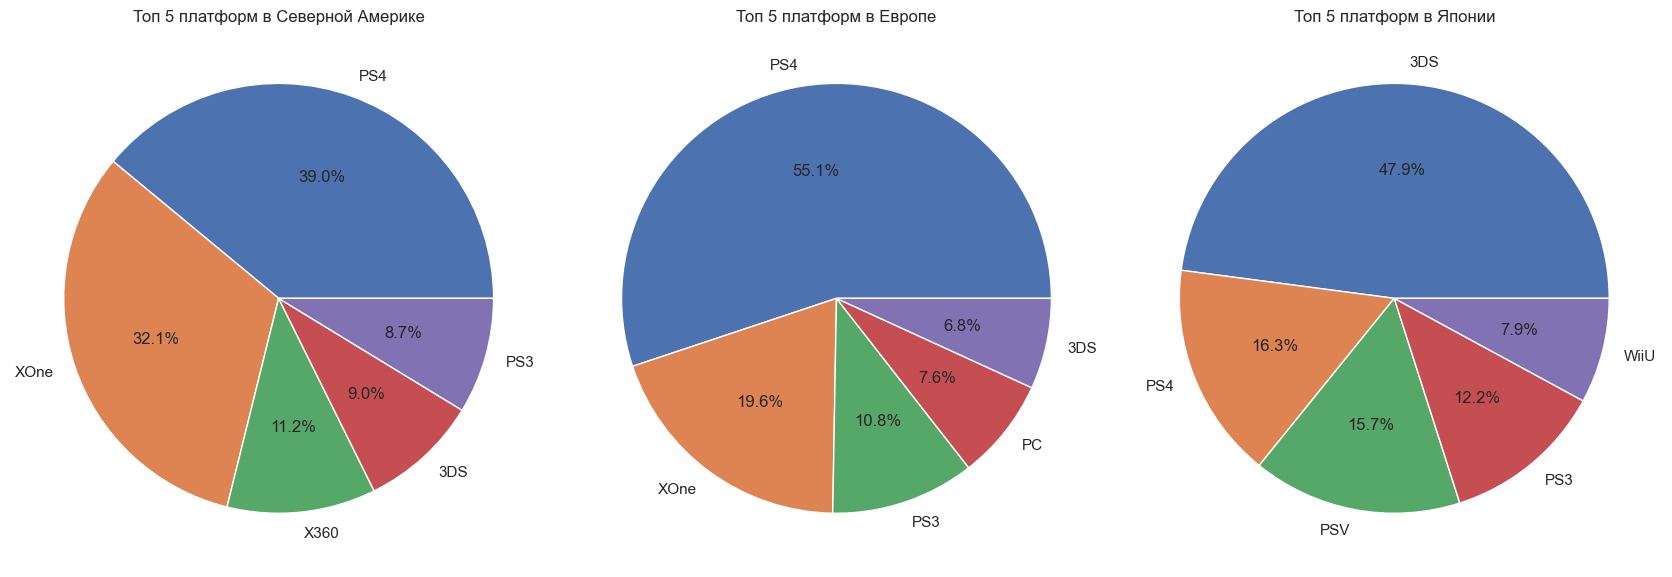

In [35]:
plt.figure(figsize=(17, 8))

plt.subplot(1, 3, 1)
plt.pie(na_platform['percent'], labels=na_platform.index, autopct='%1.1f%%')
plt.title('Топ 5 платформ в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_platform['percent'], labels=eu_platform.index, autopct='%1.1f%%')
plt.title('Топ 5 платформ в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_platform['percent'], labels=jp_platform.index, autopct='%1.1f%%')
plt.title('Топ 5 платформ в Японии')

plt.tight_layout()
plt.show()

Из анализа данных по продажам видеоигр в Северной Америке (NA), Европе (EU) и Японии (JP) можно сделать следующие выводы:

* В Северной Америке наибольшую популярность имеют платформы PS4 и XOne. Они суммарно составляют около 71% всех продаж игр в этом регионе. 
* В Европе популярность платформ PS4 и XOne также высока, их доля около 74% продаж.
* В Японии популярными платформами являются PS4 и 3DS, их доля составляет около 64%. А платформа XOne вообще не вошла в топ 5 популярных платформ.

### Топ 5 популярных жанров по регионам

In [36]:
na_genre = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
na_genre['percent'] = na_genre['na_sales']/na_genre['na_sales'].sum()*100
display(na_genre.style.format('{:.2f}'))

eu_genre = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
eu_genre['percent'] = eu_genre['eu_sales']/eu_genre['eu_sales'].sum()*100
display(eu_genre.style.format('{:.2f}'))

jp_genre = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
jp_genre['percent'] = jp_genre['jp_sales']/jp_genre['jp_sales'].sum()*100
display(jp_genre.style.format('{:.2f}'))

,na_sales,percent
genre,,
Shooter,79.02,32.10
Action,72.53,29.46
Sports,46.13,18.74
Role-Playing,33.47,13.59
Misc,15.05,6.11


,eu_sales,percent
genre,,
Action,74.68,32.72
Shooter,65.52,28.71
Sports,45.73,20.04
Role-Playing,28.17,12.34
Racing,14.13,6.19


,jp_sales,percent
genre,,
Role-Playing,31.16,40.16
Action,29.58,38.12
Fighting,6.37,8.21
Misc,5.61,7.23
Shooter,4.87,6.28


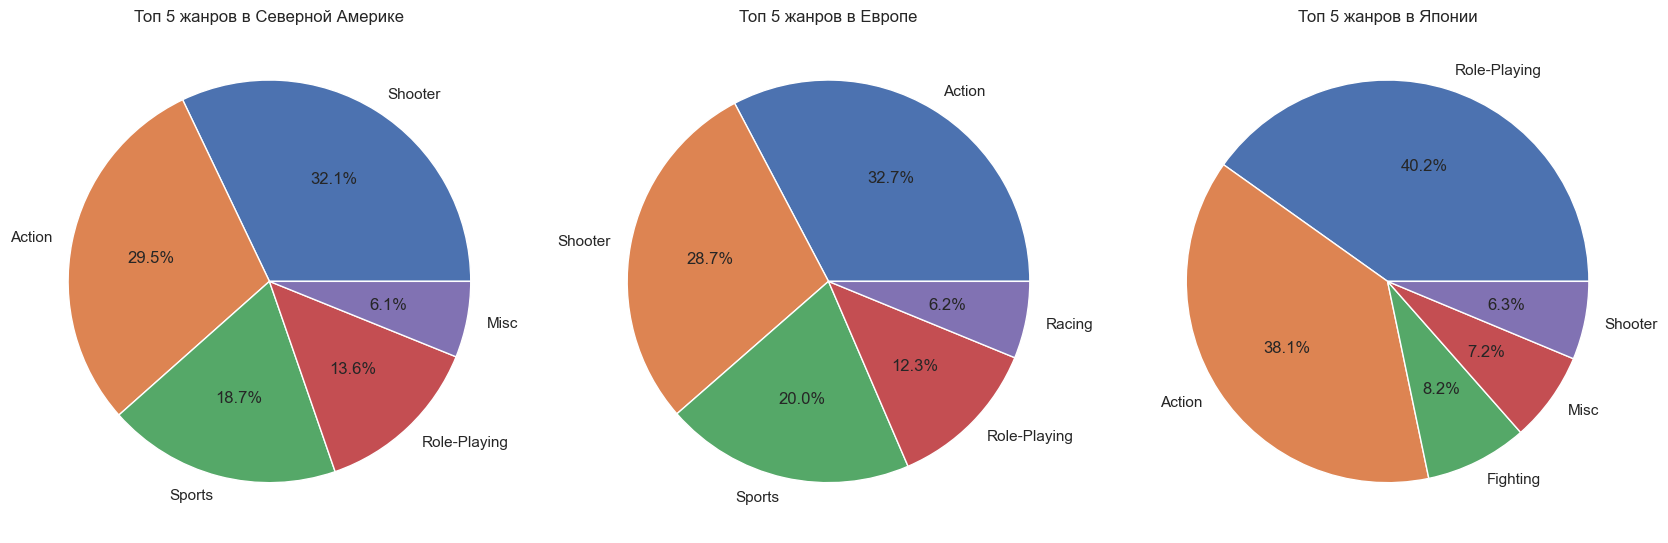

In [37]:
plt.figure(figsize=(17, 8))

plt.subplot(1, 3, 1)
plt.pie(na_genre['percent'], labels=na_genre.index, autopct='%1.1f%%')
plt.title('Топ 5 жанров в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_genre['percent'], labels=eu_genre.index, autopct='%1.1f%%')
plt.title('Топ 5 жанров в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_genre['percent'], labels=jp_genre.index, autopct='%1.1f%%')
plt.title('Топ 5 жанров в Японии')

plt.tight_layout()
plt.show()

Исходя из данных о продажах игр в Северной Америке (NA), Европе (EU) и Японии (JP) можно сделать следующие выводы:

* В Северной Америке наиболее популярные жанры игр: Action, Sports, Shooter, Role-Playing и Misc. Доля продаж игр жанров Shooter и Action составляет около 62% от общих продаж игр в регионе.
* В Европе наиболее популярные жанры игр: Action, Sports, Shooter, Role-Playing и Racing. Доля продаж игр жанров Shooter и Action составляет около 61% от общих продаж игр в регионе.
* В Японии наиболее популярные жанры игр: Role-Playing, Action, Misc, Fighting и Shooter. Доля продаж игр жанров Role-Playing и Action составляет около 78% от общих продаж игр в регионе. При этом у жанра Shooter самый низкий показатель 6,3%

Таким образом, можно сделать вывод, что предпочтения по жанрам игр отличаются в разных регионах. Action, Sports и Shooter являются популярными жанрами в Северной Америке и Европе, в то время как в Японии самым популярным жанром является Role-Playing.

### Топ 5 популярных рейтингов по регионам

In [38]:
na_rating = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
na_rating['percent'] = na_rating['na_sales']/na_rating['na_sales'].sum()*100
display(na_rating.style.format('{:.2f}'))

eu_rating = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
eu_rating['percent'] = eu_rating['eu_sales']/eu_rating['eu_sales'].sum()*100
display(eu_rating.style.format('{:.2f}'))

jp_rating = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
jp_rating['percent'] = jp_rating['jp_sales']/jp_rating['jp_sales'].sum()*100
display(jp_rating.style.format('{:.2f}'))

,na_sales,percent
rating,,
M,96.42,33.94
RT,64.72,22.78
E,50.74,17.86
T,38.95,13.71
E10+,33.23,11.70


,eu_sales,percent
rating,,
M,93.44,34.52
RT,58.95,21.78
E,58.06,21.45
T,34.07,12.59
E10+,26.16,9.66


,jp_sales,percent
rating,,
RT,56.90,61.12
T,14.78,15.88
E,8.94,9.60
M,8.01,8.60
E10+,4.46,4.79


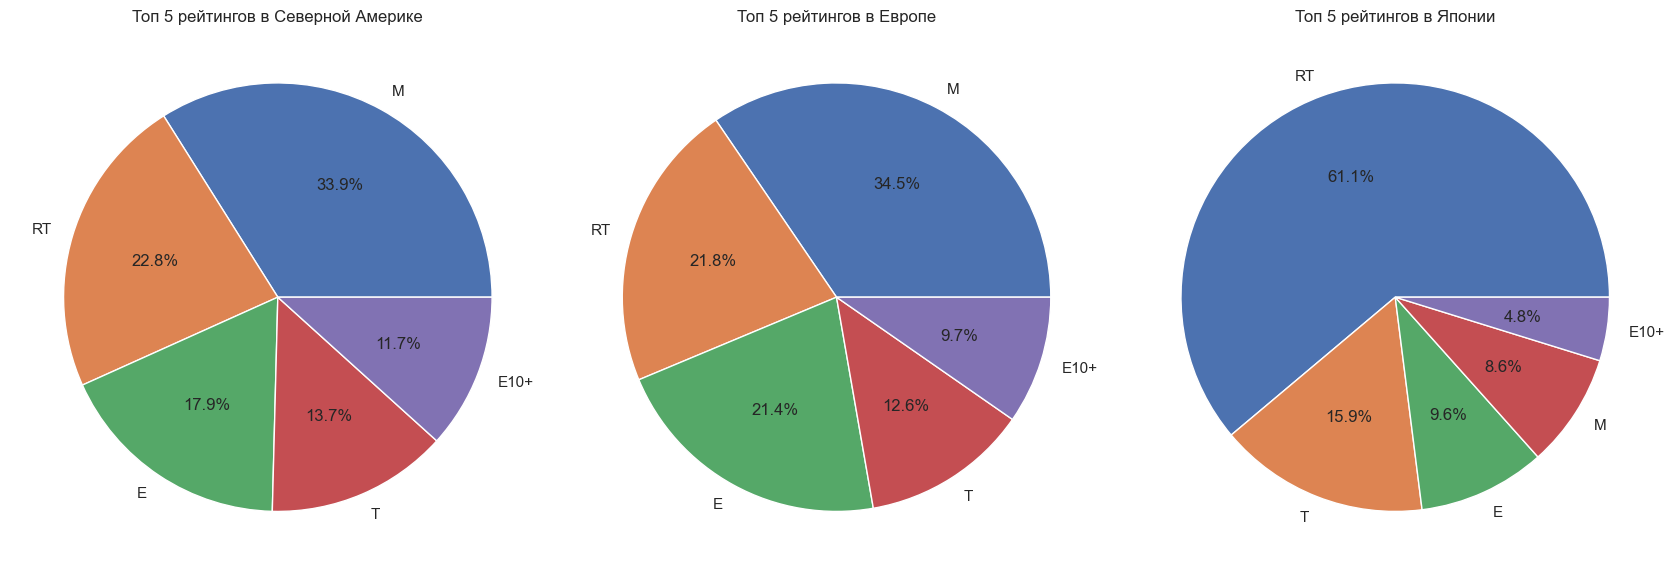

In [39]:
plt.figure(figsize=(17, 8))

plt.subplot(1, 3, 1)
plt.pie(na_rating['percent'], labels=na_rating.index, autopct='%1.1f%%')
plt.title('Топ 5 рейтингов в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_rating['percent'], labels=eu_rating.index, autopct='%1.1f%%')
plt.title('Топ 5 рейтингов в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_rating['percent'], labels=jp_rating.index, autopct='%1.1f%%')
plt.title('Топ 5 рейтингов в Японии')

plt.tight_layout()
plt.show()

* Из анализа видно, что в Северной Америке наиболее популярны игры с рейтингом "M" (взрослые), которые составляют 33.9% от общих продаж в регионе
* В Европе также наиболее популярны игры с рейтингом "M" , но их доли в продажах немного отличаются от американских рынков. Игры с рейтингом "M" составляют 34.5% от общих продаж
* В Японии ситуация отличается от других регионов. Здесь самыми популярными являются игры с рейтингом "RT" (рейтинг не определен), которые составляют 61.1% от общих продаж. Есть также хороший спрос на игры с рейтингом "T" (подростки), их доля составляет 15,9% от общих продаж.

**Вывод**

Из анализа видно:

* В Северной Америке наибольшую популярность имеют платформы PS4 и XOne. Они суммарно составляют около 71% всех продаж игр в этом регионе.
* В Европе популярность платформ PS4 и XOne также высока, их доля около 74% продаж.
* В Японии популярными платформами являются PS4 и 3DS, их доля составляет около 64%. А платформа XOne вообще не вошла в топ 5 популярных платформ.


* В Северной Америке наиболее популярные жанры игр: Action, Sports, Shooter, Role-Playing и Misc. Доля продаж игр жанров Shooter и Action составляет около 62% от общих продаж игр в регионе.
* В Европе наиболее популярные жанры игр: Action, Sports, Shooter, Role-Playing и Racing. Доля продаж игр жанров Shooter и Action составляет около 61% от общих продаж игр в регионе.
* В Японии наиболее популярные жанры игр: Role-Playing, Action, Misc, Fighting и Shooter. Доля продаж игр жанров Role-Playing и Action составляет около 78% от общих продаж игр в регионе. При этом у жанра Shooter самый низкий показатель 6,3%


* В Северной Америке наиболее популярны игры с рейтингом "M" (взрослые), которые составляют 33.9% от общих продаж в регионе
* В Европе также наиболее популярны игры с рейтингом "M" , но их доли в продажах немного отличаются от американских рынков. Игры с рейтингом "M" составляют 34.5% от общих продаж
* В Японии ситуация отличается от других регионов. Здесь самыми популярными являются игры с рейтингом "RT" (рейтинг не определен), которые составляют 61.1% от общих продаж. Есть также хороший спрос на игры с рейтингом "T" (подростки), их доля составляет 15,9% от общих продаж.


## Проверка гипотез

**Нулевая гипотеза:** средние пользовательские рейтинги платформ XOne и PC одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ XOne и PC разные.


In [40]:
# сравнение средних пользовательских рейтингов платформ Xbox One и PC
xbox_one_ratings = df_actual[df_actual['platform'] == 'XOne']['user_score'].notnull()
pc_ratings = df_actual[df_actual['platform'] == 'PC']['user_score'].notnull()

alpha = 0.05

results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

display(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ XOne и PC разные.')
else:
    print('Принимаем нулевую гипотезу: средние пользовательские рейтинги платформ XOne и PC одинаковые.')

'p-value: 0.05500062389862723'

Принимаем нулевую гипотезу: средние пользовательские рейтинги платформ XOne и PC одинаковые.


Для проверки гипотез использовался t-тест для независимых выборок, потому что у нас две независимые группы (XOne и PC) и мы хотим сравнить их средние значения. Также, учитывая, что выборки могут иметь разные дисперсии, был использован параметр equal_var=False для корректной проверки гипотезы.

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports разные.

In [41]:
# cравнение средних пользовательских рейтингов жанров Action и Sports
action_ratings = df_actual[df_actual['genre'] == 'Action']['user_score'].notnull()
sports_ratings = df_actual[df_actual['genre'] == 'Sports']['user_score'].notnull()

alpha = 0.05

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

display(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.')
else:
    print('Принимаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.')

'p-value: 1.1856864025552125e-14'

Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.


Для проверки гипотез был применен t-тест для независимых выборок (так как рейтинги разных жанров).
Параметр equal_var=False указывает на то, что дисперсии выборок могут быть различными.
Критерий был выбран, так как он позволяет проверить различие между средними значениями двух выборок и определить, является ли это различие значимым.

## Вывод

**Были загружены данные из которых видно:**
* Датафрейм содержит 16715 строк и 11 столбцов. В ней представлена информация о видеоиграх, включая название игры, платформу, год выпуска, жанр, объемы продаж в разных регионах, оценки критиков и пользователей, а также рейтинг игры.
* Некоторые столбцы содержат пропущенные значения: "Name" (2 пропущенных значения), "Year_of_Release" (269 пропущенных значений), "Genre" (2 пропущенных значения), "Critic_Score" (8580 пропущенных значений), "User_Score" (6701 пропущенное значение) и "Rating" (6766 пропущенных значений).
* Типы данных в таблице включают в себя числовые значения (float64) и текстовые значения (object).
* Общий объем памяти, занимающий таблица, составляет 1.4+ мегабайт.

**Выполнена обработка после которой пропущенные значения были устранены, названия столбцов были приведены к нижнему регистру, а типы данных столбцов были преобразованы в нужные. Также были выполнены следующие операции:**
   * Значения 'tbd' в столбце 'user_score' были заменены на 'NaN' и приведены к типу float.
   * Пропущенные значения в столбце 'rating' были заменены на 'RT'.
   * Была выполнена проверка наличия явных и неявных дубликатов. В результате, явных дубликатов не обнаружено.
   * Была рассчитана суммарная продажа игр во всех регионах и добавлен соответствующий столбец 'total_sales'.

**Проведен исследовательский анализ данных, из которого следует:** 
* Лидирующими и растущими платформами на рынке видеоигр являются PS4, XOne и 3DS. Они также являются самыми прибыльными платформами. 
* Существуют различия влияния отзывов и оценок критиков и пользователей на продажи игр на различных платформах. На PS4 отзывы критиков имеют большее влияние, на XOne - слабое влияние отзывов критиков, а на 3DS - оценки критиков и пользователей не являются основными факторами, влияющими на продажи.
* Стоит обратить внимание на жанры Shooter, Sports, Action, Role-Playing и Adventure, поскольку они имеют высокий потенциал для получения высоких доходов от продажи игр.

**Составлен портрет пользователя по каждому региону и которого видно следующее:**
* В Северной Америке наибольшую популярность имеют платформы PS4 и XOne. Они суммарно составляют около 71% всех продаж игр в этом регионе.
* В Европе популярность платформ PS4 и XOne также высока, их доля около 74% продаж.
* В Японии популярными платформами являются PS4 и 3DS, их доля составляет около 64%. А платформа XOne вообще не вошла в топ 5 популярных платформ.


* В Северной Америке наиболее популярные жанры игр: Action, Sports, Shooter, Role-Playing и Misc. Доля продаж игр жанров Shooter и Action составляет около 62% от общих продаж игр в регионе.
* В Европе наиболее популярные жанры игр: Action, Sports, Shooter, Role-Playing и Racing. Доля продаж игр жанров Shooter и Action составляет около 61% от общих продаж игр в регионе.
* В Японии наиболее популярные жанры игр: Role-Playing, Action, Misc, Fighting и Shooter. Доля продаж игр жанров Role-Playing и Action составляет около 78% от общих продаж игр в регионе. При этом у жанра Shooter самый низкий показатель 6,3%


* В Северной Америке наиболее популярны игры с рейтингом "M" (взрослые), которые составляют 33.9% от общих продаж в регионе
* В Европе также наиболее популярны игры с рейтингом "M" , но их доли в продажах немного отличаются от американских рынков. Игры с рейтингом "M" составляют 34.5% от общих продаж
* В Японии ситуация отличается от других регионов. Здесь самыми популярными являются игры с рейтингом "RT" (рейтинг не определен), которые составляют 61.1% от общих продаж. Есть также хороший спрос на игры с рейтингом "T" (подростки), их доля составляет 15,9% от общих продаж.

**Также были проверены и подтверждены следующие гипотезы:**
   * Средние пользовательские рейтинги платформ XOne и PC одинаковые
   * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

